In [1]:
import pandas as pd
import xarray as xr
from bluemath_tk.waves.calibration import CalVal, process_imos_satellite_data

/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:766: SyntaxWarning: invalid escape sequence '\d'
  ax5.set_xlabel("$\u03b8_{m}$ ($\degree$)")
/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:781: SyntaxWarning: invalid escape sequence '\d'
  ax6.set_xlabel("$\u03b8_{m}$ ($\degree$)")


In [2]:
csiro = (
    pd.read_csv("data/csiro_cleaned.csv")
    .set_index("Unnamed: 0")
    .drop(columns=["Hs_cal"])
    .dropna()
)
csiro.index = pd.to_datetime(csiro.index)
csiro_lon, csiro_lat = 284.55, 35.01  # add lon / lat coordinates of csiro node
csiro

,Hs,Dm,Tp,DirM,Hsea,Hswell1,Hswell2,Hswell3,Dirsea,Dirswell1,Dirswell2,Dirswell3
Unnamed: 0,,,,,,,,,,,,
2020-01-01 00:00:00.000000000,1.567946,214.40703,7.326915,204.45041,0.442058,1.432056,0.390761,0.244050,147.124340,215.46768,39.902763,129.233370
2020-01-01 03:59:59.999986560,1.643933,220.83873,7.263622,204.01828,0.490074,1.151218,0.948546,0.487134,147.769490,219.66653,258.063230,45.031826
2020-01-01 05:00:00.000013440,1.670936,223.81673,7.209559,204.49837,0.468126,1.295786,0.802131,0.500409,147.708860,218.12576,279.834300,45.108880
2020-01-01 06:00:00.000000000,1.683340,226.90387,7.142347,212.35866,0.443235,1.359751,0.725116,0.512307,147.616790,218.68436,275.615230,46.064526
2020-01-01 08:00:00.000013440,1.701592,235.53116,6.962685,214.38504,0.363160,1.241177,0.885258,0.525444,127.813286,217.95415,294.710080,47.862610
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-29 03:59:59.999986560,1.452218,179.57440,5.175957,196.76665,0.052283,1.321897,0.570650,0.182075,26.759140,196.77672,128.761080,118.674900
2025-03-29 05:00:00.000013440,1.466100,179.58475,5.287878,198.00026,0.045645,1.117347,0.770127,0.537085,27.319120,211.75989,166.839940,128.698640
2025-03-29 06:00:00.000000000,1.478113,179.68814,5.407790,185.13646,0.039637,1.376764,0.521039,0.127622,27.650782,185.17776,128.635060,127.500000


In [3]:
satellite_raw = xr.open_dataset("data/satellite_dataset_carolinas.nc")[
    [
        "SWH_KU_quality_control",
        "SWH_KA_quality_control",
        "SWH_KU_CAL",
        "SWH_KA_CAL",
        "BOT_DEPTH",
    ]
].to_dataframe()
satellite_processed = process_imos_satellite_data(
    satellite_df=satellite_raw,
    ini_lat=34.5,
    end_lat=35.5,
    ini_lon=284.0,
    end_lon=285.0,
    depth_threshold=-100,
)
satellite_processed

/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satellite_df["Hs_CAL"] = np.nansum(


,SWH_KU_quality_control,SWH_KA_quality_control,SWH_KU_CAL,SWH_KA_CAL,BOT_DEPTH,LATITUDE,LONGITUDE,Hs_CAL
TIME,,,,,,,,
1985-04-09 11:15:39.414058998,1.0,NaN,1.472,NaN,-2934.0,34.546211,284.861542,1.472
1985-04-09 11:15:40.398433059,1.0,NaN,1.414,NaN,-2845.0,34.600159,284.831024,1.414
1985-04-09 11:15:41.375001892,1.0,NaN,1.404,NaN,-2694.0,34.654102,284.800446,1.404
1985-04-09 11:15:42.359375954,1.0,NaN,1.481,NaN,-2586.0,34.708038,284.769836,1.481
1985-04-09 11:15:43.335934728,1.0,NaN,1.510,NaN,-2389.0,34.761971,284.739197,1.510
...,...,...,...,...,...,...,...,...
2025-01-02 15:24:23.999995136,1.0,NaN,2.146,NaN,-2783.0,34.768677,284.964325,2.146
2025-01-02 15:24:24.999999744,1.0,NaN,1.995,NaN,-2886.0,34.710060,284.946960,1.995
2025-01-02 15:24:26.000004608,1.0,NaN,2.061,NaN,-2865.0,34.651436,284.929657,2.061


In [4]:
buoy = (
    pd.read_csv("data/buoy_cleaned.csv")
    .set_index("Unnamed: 0")
    .rename(columns={"Hs_Buoy": "Hs_VAL"})
)
buoy.index = pd.to_datetime(buoy.index)
buoy_lon, buoy_lat = 360 - 75.39, 35.01  # add lon / lat coordinates of csiro node
buoy

,YYYY,MM,DD,hh,mm,WD,WSPD,Tp_Buoy,Hs_VAL,Dp_Buoy,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE
Unnamed: 0,,,,,,,,,,,,,,,,,,
2020-01-01 00:40:00,2020.0,1.0,1.0,0.0,40.0,270.0,9.1,12.0,1.43,10.00,5.38,28.0,1009.2,15.6,22.8,6.1,99.0,99.0
2020-01-01 01:40:00,2020.0,1.0,1.0,1.0,40.0,265.0,10.6,13.6,1.65,7.14,5.30,184.0,1009.3,15.5,22.6,5.9,99.0,99.0
2020-01-01 02:40:00,2020.0,1.0,1.0,2.0,40.0,266.0,10.9,14.8,1.60,7.14,4.91,174.0,1009.7,15.4,22.8,6.3,99.0,99.0
2020-01-01 03:40:00,2020.0,1.0,1.0,3.0,40.0,272.0,12.0,14.6,1.63,10.81,4.84,38.0,1009.7,15.5,23.0,6.6,99.0,99.0
2020-01-01 04:40:00,2020.0,1.0,1.0,4.0,40.0,271.0,12.5,16.0,1.62,10.81,4.88,45.0,1009.5,15.5,23.0,6.2,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:40:00,2024.0,12.0,31.0,21.0,40.0,233.0,7.7,9.6,1.34,4.76,4.56,171.0,1005.4,999.0,22.5,999.0,99.0,99.0
2024-12-31 22:10:00,2024.0,12.0,31.0,22.0,10.0,222.0,8.5,10.2,1.43,4.55,4.55,196.0,1005.3,999.0,22.5,999.0,99.0,99.0
2024-12-31 22:40:00,2024.0,12.0,31.0,22.0,40.0,217.0,9.4,11.2,1.53,4.55,4.53,187.0,1004.8,999.0,22.5,999.0,99.0,99.0


In [5]:
calval = CalVal()
calval

/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:348: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if direcs[i] < 0:
/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:350: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if direcs[i] > 0 and waves[i] > 0:
/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:351: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bin_i

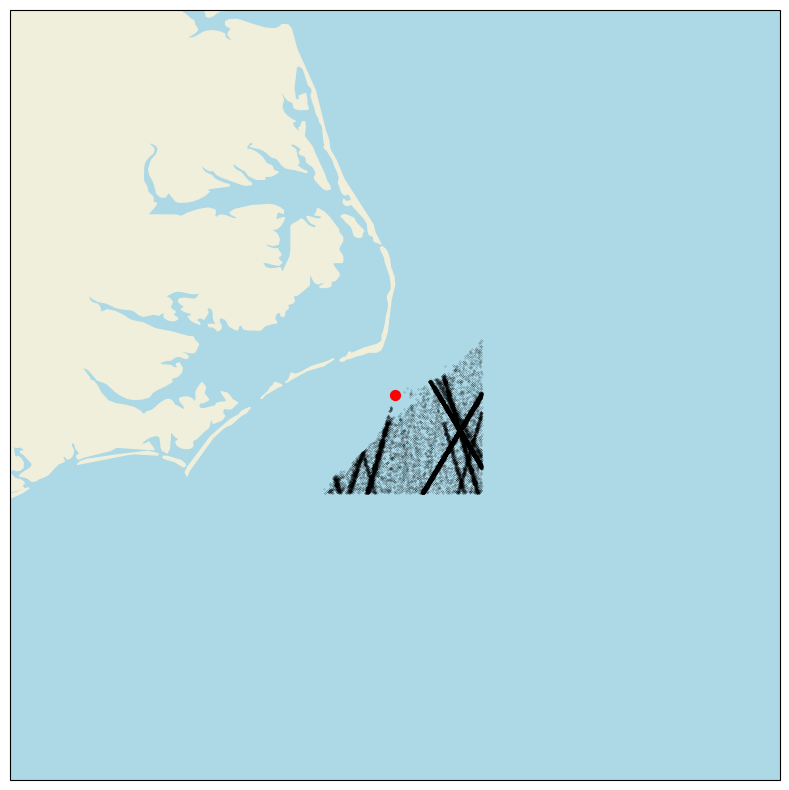

In [6]:
calval.fit(
    data=csiro,
    data_longitude=csiro_lon,
    data_latitude=csiro_lat,
    data_to_calibrate=satellite_processed,
    max_time_diff=1,
)

In [7]:
calval.calibration_params

{'sea_correction': {0: 0.5892701988902185,
  1: 1.0,
  2: 1.6987733044400375,
  3: 1.0,
  4: 1.0,
  5: 1.0,
  6: 0.8533926941477511,
  7: 0.7337777892541386,
  8: 1.0,
  9: 0.8176338366767403,
  10: 1.0,
  11: 1.0,
  12: 1.0,
  13: 1.0,
  14: 1.0,
  15: 1.0},
 'swell_correction': {0: 1.0,
  1: 1.3632029639459065,
  2: 1.3834900333713176,
  3: 1.1751503135789285,
  4: 1.1679353346594676,
  5: 1.0,
  6: 0.9789900856887891,
  7: 1.0044318774110805,
  8: 1.164252052032037,
  9: 0.8674492237848238,
  10: 0.8897452222706569,
  11: 1.0033290124321061,
  12: 1.0,
  13: 1.0815175420018615,
  14: 1.42924480873958,
  15: 1.408029718528272,
  16: 1.4830376062393522}}

/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/core/plotting/scatter.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1, y1, z = x[idx], y[idx], z[idx]
/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/waves/calibration.py:762: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])
/home/tausiaj/GitHub-GeoOcean/BlueMath_tk/bluemath_tk/core/plotting/scatter.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1, y1, z = x[idx], y[idx], z[idx]
/home/tausiaj/GitH

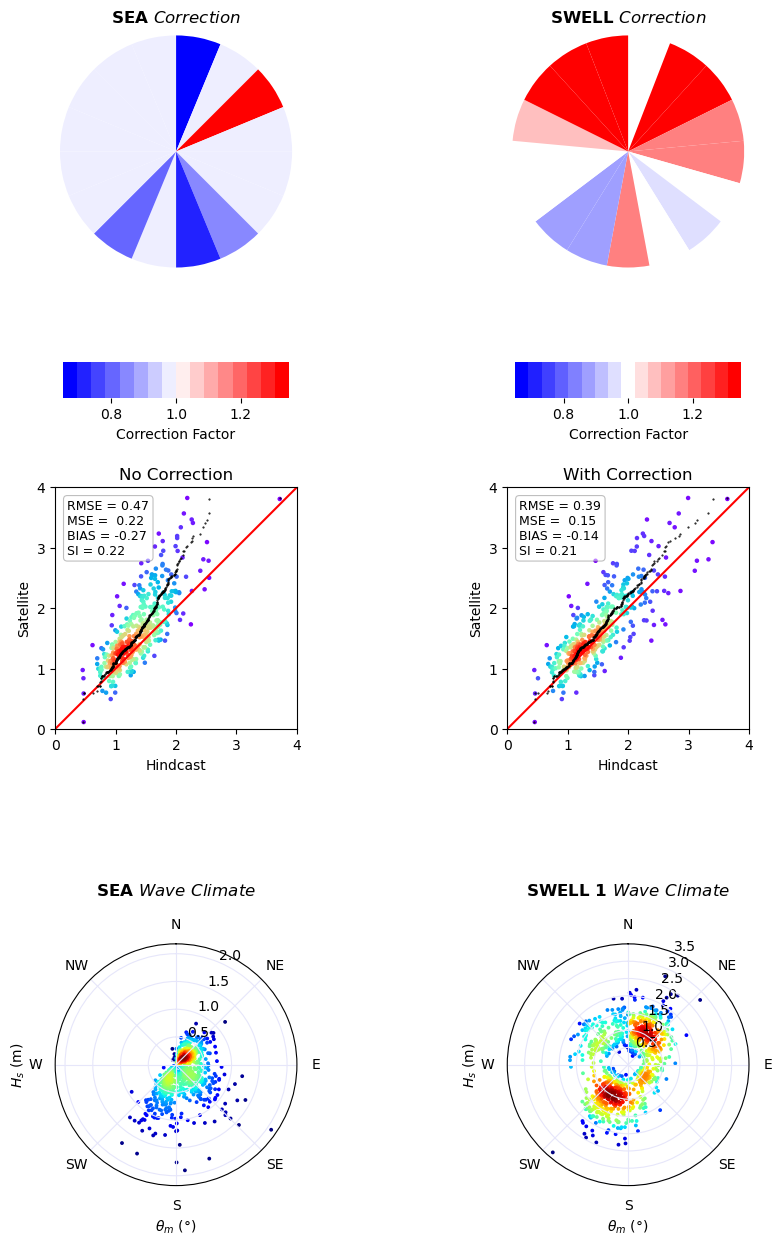

In [8]:
calval.plot_calibration_results();

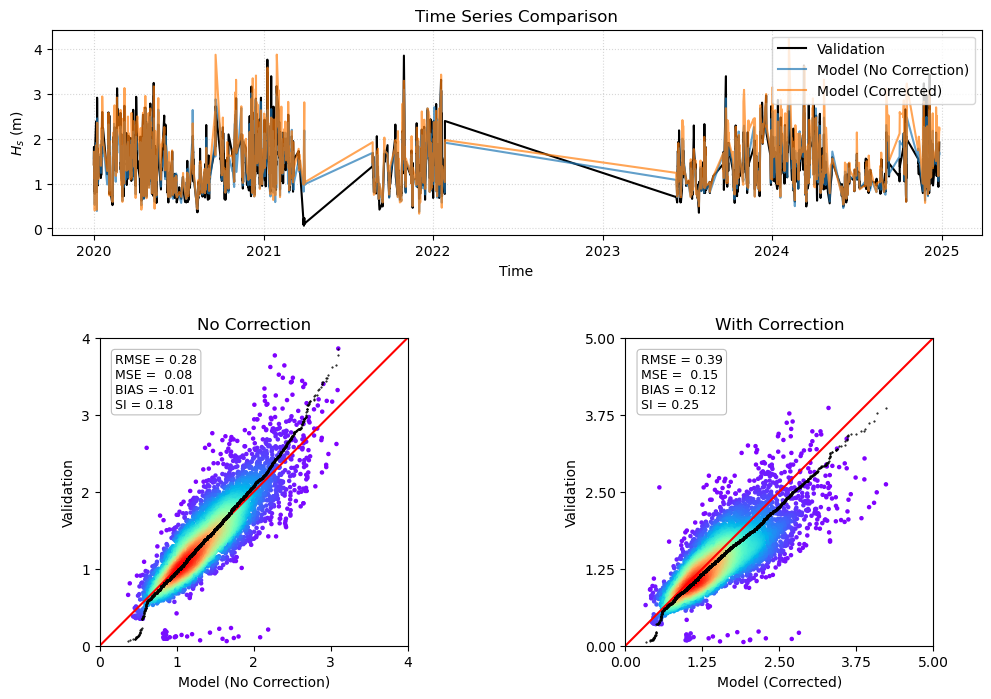

In [9]:
calval.validate_calibration(data_to_validate=buoy);